In [23]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint   
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# load the pre-shuffled train and test data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

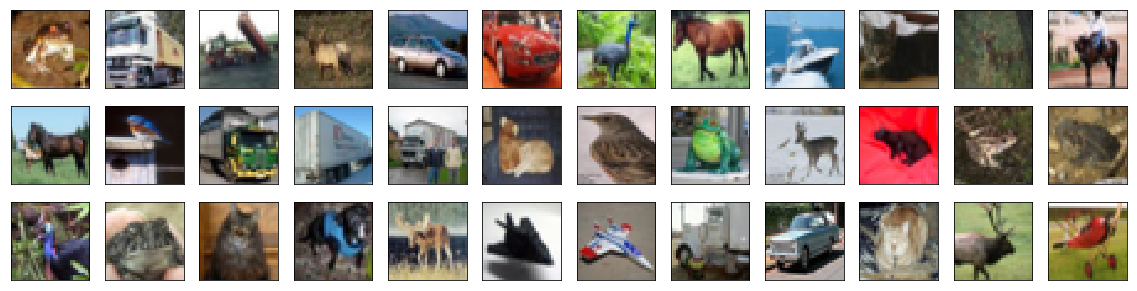

In [3]:
# visualize the data
fig=plt.figure(figsize=(20,5))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [4]:
# rescale [0,255] --> [0,1]
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255 

In [5]:
# one-hot-encode the labels
num_classes=len(np.unique(y_train))
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)

In [6]:
# define the model
model=Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642.0
Trainable params: 3,590,642.0
Non-trainable params: 0.0
____________________________________________________________

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
# train the model
checkpointer=ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.1,callbacks=[checkpointer],verbose=2,
               shuffle=True)

In [8]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

In [9]:
# evaluate and print test accuracy
score=model.evaluate(X_test,y_test,verbose=0)[1]*100

print('Test accuracy: {}%'.format(score))

Test accuracy: 42.38%


In [10]:
# define the model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
# train the model
checkpointer=ModelCheckpoint(filepath='CNN.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.1,callbacks=[checkpointer],verbose=2,
               shuffle=True)

In [12]:
# load the weights that yielded the best validation accuracy
model.load_weights('CNN.weights.best.hdf5')

In [13]:
# evaluate and print test accuracy
score=model.evaluate(X_test,y_test,verbose=0)[1]*100

print('Test accuracy: {}%'.format(score))

Test accuracy: 67.42%


In [14]:
# get predictions on the test set
predicted=model.predict(X_test)

In [15]:
# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

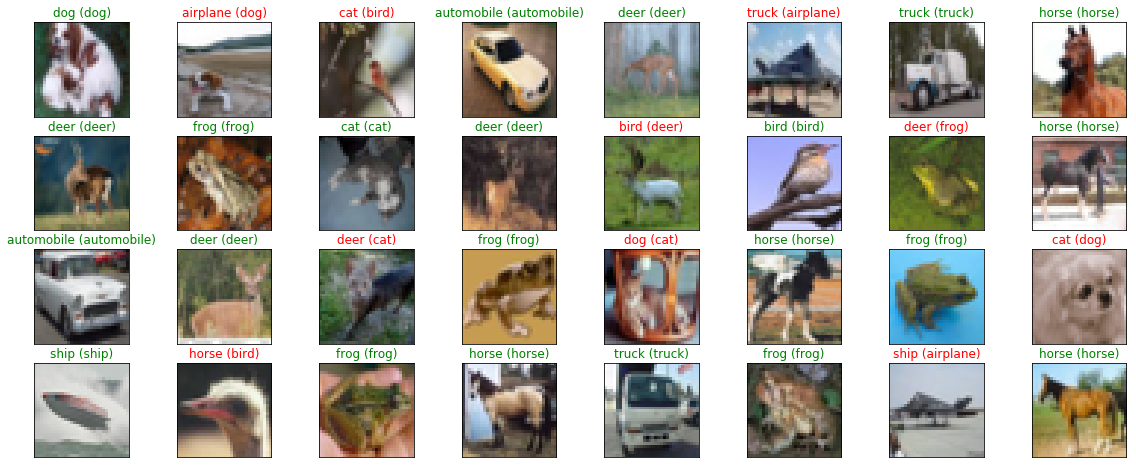

In [16]:
# plot a random sample of test images, their predicted labels, and ground truth
fig=plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
    ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx=np.argmax(predicted[idx])
    true_idx=np.argmax(y_test[idx])
    ax.set_title('{} ({})'.format(cifar10_labels[pred_idx],cifar10_labels[true_idx]),
                 color=("green" if pred_idx==true_idx else "red"))

In [17]:
# create and configure augmented image generator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
datagen.fit(X_train)

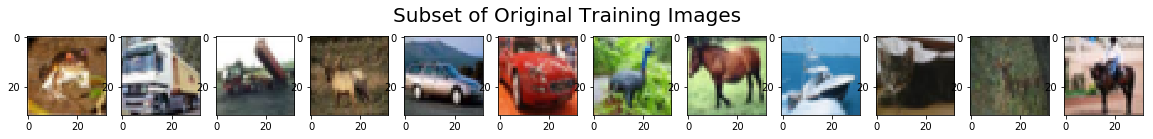

In [18]:
# visualize subset of training data
X_train_subset=X_train[:12]

fig=plt.figure(figsize=(20,2))
for i in range(0,len(X_train_subset)):
    ax=fig.add_subplot(1,12,i+1)
    ax.imshow(X_train_subset[i])
fig.suptitle('Subset of Original Training Images',fontsize=20);

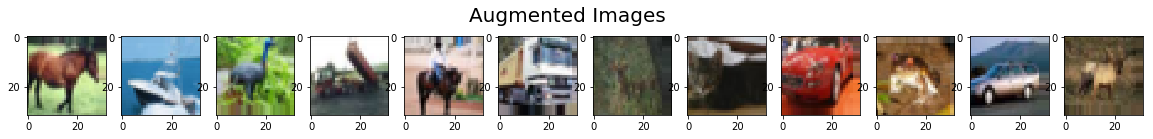

In [20]:
# visualize augmented images
fig=plt.figure(figsize=(20,2))
for x_batch in datagen.flow(X_train_subset,batch_size=12):
    for i in range(0,12):
        ax=fig.add_subplot(1,12,i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images',fontsize=20)
    break;

In [21]:
# define the model
model=Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 3,590,642.0
Trainable params: 3,590,642.0
Non-trainable params: 0.0
____________________________________________________________

In [22]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [28]:
# train the model
batch_size=32
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)
checkpointer=ModelCheckpoint(filepath='aug_model.weights.best.hdf5',verbose=1,save_best_only=True)
model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0]//batch_size,epochs=20,verbose=2,callbacks=[checkpointer],
                    validation_data=datagen.flow(X_val,y_val,batch_size=batch_size),
                    validation_steps=X_val.shape[0]//batch_size)

Epoch 1/20
Epoch 00000: val_loss improved from inf to 1.74916, saving model to aug_model.weights.best.hdf5
65s - loss: 1.8654 - acc: 0.3300 - val_loss: 1.7492 - val_acc: 0.3739
Epoch 2/20
Epoch 00001: val_loss improved from 1.74916 to 1.72188, saving model to aug_model.weights.best.hdf5
67s - loss: 1.8555 - acc: 0.3368 - val_loss: 1.7219 - val_acc: 0.3830
Epoch 3/20
Epoch 00002: val_loss did not improve
67s - loss: 1.8547 - acc: 0.3351 - val_loss: 1.7625 - val_acc: 0.3671
Epoch 4/20
Epoch 00003: val_loss did not improve
71s - loss: 1.8544 - acc: 0.3392 - val_loss: 1.7358 - val_acc: 0.3593
Epoch 5/20
Epoch 00004: val_loss did not improve
70s - loss: 1.8478 - acc: 0.3428 - val_loss: 1.7233 - val_acc: 0.3776
Epoch 6/20
Epoch 00005: val_loss did not improve
71s - loss: 1.8509 - acc: 0.3395 - val_loss: 1.7264 - val_acc: 0.3779
Epoch 7/20
Epoch 00006: val_loss improved from 1.72188 to 1.71245, saving model to aug_model.weights.best.hdf5
78s - loss: 1.8357 - acc: 0.3422 - val_loss: 1.7125 - v

In [29]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

In [30]:
# evaluate and print test accuracy
score=model.evaluate(X_test,y_test,verbose=0)[1]*100

print('Test accuracy: {}%'.format(score))

Test accuracy: 41.68%
